## Checking and processing raw dataset

This notebook explores the raw dataset, numerical values, residues, structure, remove null values and generate the dataset to train the predictive models. In specific, this notebook implements:

- Read raw dataset and fasta sequence
- Check wild responses
- Check distribution responses
- Remove null values
- Create processed dataset for numerical representation


### Load libraries

Note: Please install bio and vapeplot

In [16]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot

import warnings
warnings.filterwarnings("ignore")

### Plot configuration

In [17]:
vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

### Read and checking raw dataset

In [18]:
df_data = pd.read_csv("../../raw_data/DMS_scores_DAOX.csv")
df_data

,Position,Structure,wildtype_residue,mutant_residue,Mutation,Expression score (log),"Number of cells, Expression","Number of barcodes, Expression",is wildtype,Activity score (log),"Number of cells, Activity","Number of barcodes, Activity",Normalized activity
0,2,Linker,H,E,H2E,0.056897,160.0,2.0,NaN,0.039365,123.0,2.0,0.987921
1,2,Linker,H,D,H2D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Linker,H,N,H2N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Linker,H,V,H2V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Linker,H,W,H2W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,365,Linker,E,Y,E365Y,0.012179,185.0,2.0,NaN,0.050755,154.0,2.0,1.027099
7640,365,Linker,E,H,E365H,0.009398,119.0,2.0,NaN,0.063596,77.0,2.0,1.038282
7641,365,Linker,E,N,E365N,0.035972,275.0,4.0,NaN,0.055843,154.0,4.0,1.013869
7642,365,Linker,E,I,E365I,0.000466,325.0,3.0,NaN,0.053861,212.0,4.0,1.037704


In [19]:
df_data = df_data[["Position", "Structure", "wildtype_residue", "mutant_residue", "Expression score (log)", "Activity score (log)", "Normalized activity", "is wildtype"]]
df_data

,Position,Structure,wildtype_residue,mutant_residue,Expression score (log),Activity score (log),Normalized activity,is wildtype
0,2,Linker,H,E,0.056897,0.039365,0.987921,NaN
1,2,Linker,H,D,NaN,NaN,NaN,NaN
2,2,Linker,H,N,NaN,NaN,NaN,NaN
3,2,Linker,H,V,NaN,NaN,NaN,NaN
4,2,Linker,H,W,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7639,365,Linker,E,Y,0.012179,0.050755,1.027099,NaN
7640,365,Linker,E,H,0.009398,0.063596,1.038282,NaN
7641,365,Linker,E,N,0.035972,0.055843,1.013869,NaN
7642,365,Linker,E,I,0.000466,0.053861,1.037704,NaN


### Checking wild values

Important: there are non information about the wild residues. Questions:

- is it possible to obtain it?
- How is it possible to check if the new mutations increase or reduce the target value if the wild values does not exist?

In [20]:
df_data["is wildtype"] = df_data["wildtype_residue"] == df_data["mutant_residue"]
df_data["is wildtype"].value_counts()

is wildtype
False    7280
True      364
Name: count, dtype: int64

In [21]:
wild_values = df_data[df_data["is wildtype"] == True]
wild_values["Expression score (log)"].unique()

array([nan])

### Remove null values

In [22]:
df_data = df_data.dropna()
df_data

,Position,Structure,wildtype_residue,mutant_residue,Expression score (log),Activity score (log),Normalized activity,is wildtype
0,2,Linker,H,E,0.056897,0.039365,0.987921,False
7,2,Linker,H,A,-0.001669,0.009756,1.007950,False
8,2,Linker,H,C,-0.122433,-0.047483,1.053324,False
9,2,Linker,H,G,0.013216,0.034138,1.014608,False
10,2,Linker,H,F,-0.347019,-0.359400,0.991455,False
...,...,...,...,...,...,...,...,...
7639,365,Linker,E,Y,0.012179,0.050755,1.027099,False
7640,365,Linker,E,H,0.009398,0.063596,1.038282,False
7641,365,Linker,E,N,0.035972,0.055843,1.013869,False
7642,365,Linker,E,I,0.000466,0.053861,1.037704,False


### Checking distributions for Expression and Activity score

<AxesSubplot: xlabel='Activity score (log)', ylabel='Count'>

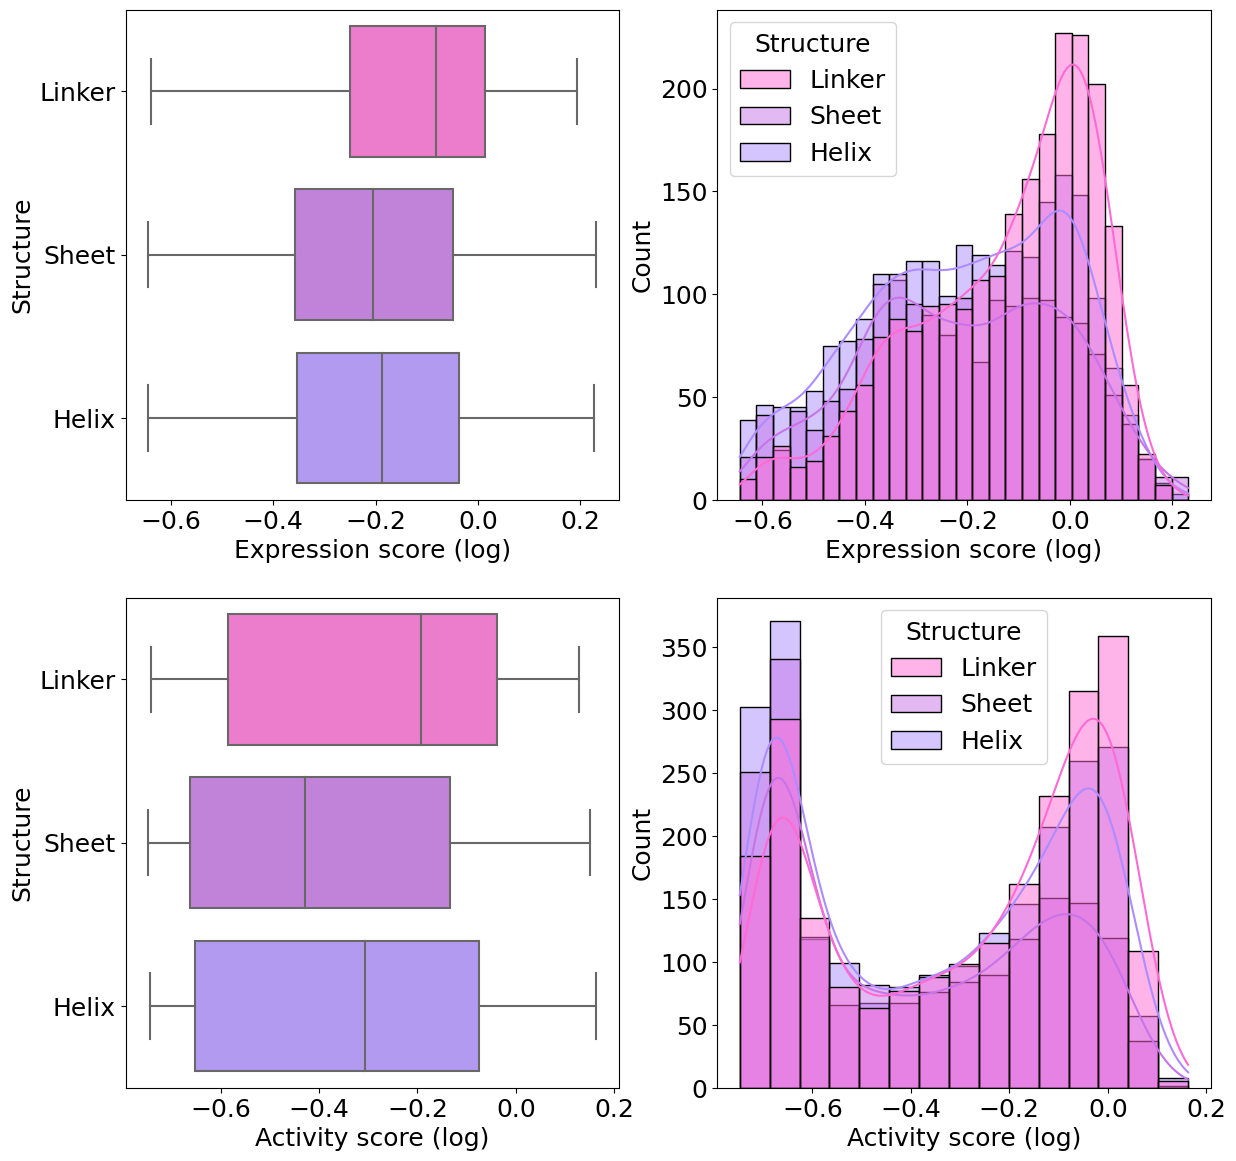

In [23]:
fig, axes = plt.subplots(2,2, figsize=(14,14))

sns.boxplot(ax=axes[0][0], data=df_data, x="Expression score (log)", y="Structure")
sns.histplot(ax=axes[0][1], data=df_data, x="Expression score (log)", hue="Structure", kde=True)

sns.boxplot(ax=axes[1][0], data=df_data, x="Activity score (log)", y="Structure")
sns.histplot(ax=axes[1][1], data=df_data, x="Activity score (log)", hue="Structure", kde=True)

### Reading fasta sequence

In [24]:
sequence = None
for record in SeqIO.parse("../../raw_data/P80324.fasta", "fasta"):
    sequence = str(record.seq)
sequence

'MHSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTFASPWAGANWTPFMTLTDGPRQAKWEESTFKKWVELVPTGHAMWLKGTRRFAQNEDGLLGHWYKDITPNYRPLPSSECPPGAIGVTYDTLSVHAPKYCQYLARELQKLGATFERRTVTSLEQAFDGADLVVNATGLGAKSIAGIDDQAAEPIRGQTVLVKSPCKRCTMDSSDPASPAYIIPRPGGEVICGGTYGVGDWDLSVNPETVQRILKHCLRLDPTISSDGTIEGIEVLRHNVGLRPARRGGPRVEAERIVLPLDRTKSPLSLGRGSARAAKEKEVTLVHAYGFSSAGYQQSWGAAEDVAQLVDEAFQRYHGAARESKL'

### Processing raw data

In [25]:
def generated_modify_seq(sequence, wild_residue, position, mutation):

    if sequence[position-1] == wild_residue:
        sequence_list = [residue for residue in sequence]
        sequence_list[position-1] = mutation
        return "".join(map(str,sequence_list))
    else:
        return np.nan

In [26]:
new_sequence_list = []

for index in df_data.index:
    new_sequence_list.append(
        generated_modify_seq(
            sequence,
            df_data["wildtype_residue"][index],
            df_data["Position"][index],
            df_data["mutant_residue"][index],
        )
    )

df_data["sequence"] = new_sequence_list
df_data = df_data.dropna()
df_data

,Position,Structure,wildtype_residue,mutant_residue,Expression score (log),Activity score (log),Normalized activity,is wildtype,sequence
0,2,Linker,H,E,0.056897,0.039365,0.987921,False,MESQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...
7,2,Linker,H,A,-0.001669,0.009756,1.007950,False,MASQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...
8,2,Linker,H,C,-0.122433,-0.047483,1.053324,False,MCSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...
9,2,Linker,H,G,0.013216,0.034138,1.014608,False,MGSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...
10,2,Linker,H,F,-0.347019,-0.359400,0.991455,False,MFSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...
...,...,...,...,...,...,...,...,...,...
7639,365,Linker,E,Y,0.012179,0.050755,1.027099,False,MHSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...
7640,365,Linker,E,H,0.009398,0.063596,1.038282,False,MHSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...
7641,365,Linker,E,N,0.035972,0.055843,1.013869,False,MHSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...
7642,365,Linker,E,I,0.000466,0.053861,1.037704,False,MHSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTF...


### Export processed dataset

In [27]:
df_data = df_data[["sequence", "Expression score (log)", "Activity score (log)"]]
df_data.columns = ["sequence", "expression", "activity"]
df_data.to_csv("../../results/process_dataset/processed_dataset_raw.csv", index=False)